 ### Generate training and testing data

In [47]:
#!/usr/bin/env python
# coding: utf-8
from PIL import Image, ImageTk, ImageDraw, ImageFilter
from IPython.display import display
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import pprint as pp

shape = ['triangle', 'square', 'circle', 'star']
inputArray = []
outputArray = []
testingArray = []
output = []
num = 1000

# Generate model training data
for i in range(num):
    oneHot = np.zeros(4)
    oneHot[i % 4] = 1
    imageFile = Image.open("./shapes/" + shape[i % 4] + "/" + str(i + 1) + ".png")
    inputArray.append((tf.keras.preprocessing.image.img_to_array(imageFile) / 255.0))
    outputArray.append(oneHot)

# Generate test data and null prediction value
for i in range(num + 50, num + 250):
    path = "./shapes/" + shape[i % 4] + "/" + str(i + 1) + ".png"
    output.append([path, None])
    imageFile = Image.open(path)
    testingArray.append((tf.keras.preprocessing.image.img_to_array(imageFile) / 255.0))

 ### Define neural network model

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (8, 8)))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'sigmoid'))
model.add(Dense(units = 4, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1179712   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 1,180,292
Trainable params: 1,180,292
Non-trainable params: 0
_________________________________________________________________


### Compile and fit model

In [3]:
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'mean_squared_error')
model.fit(np.array(inputArray), np.array(outputArray), batch_size = 32, epochs = 3)

Epoch 1/3
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1346
Epoch 2/3
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0556
Epoch 3/3
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0281


### Predict using finished model

In [4]:
prediction = model.predict(np.array(testingArray))

### Parse predictions

circle


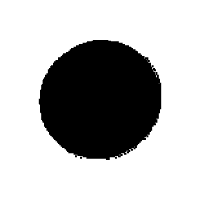

star


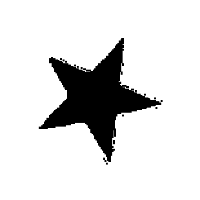

triangle


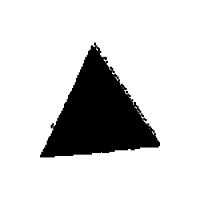

square


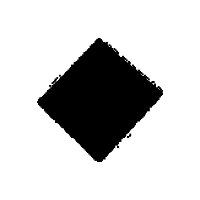

circle


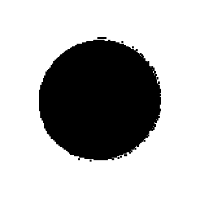

star


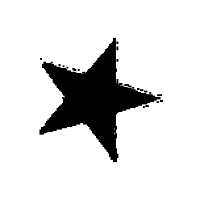

triangle


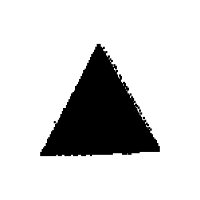

square


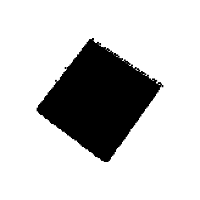

circle


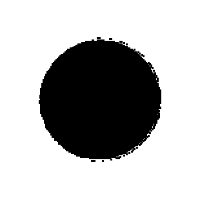

star


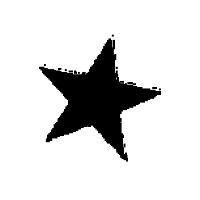

triangle


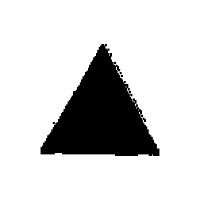

square


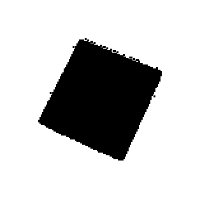

circle


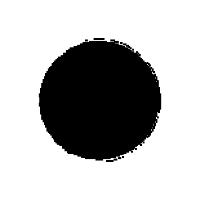

star


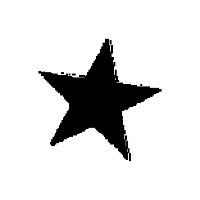

triangle


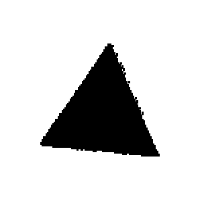

square


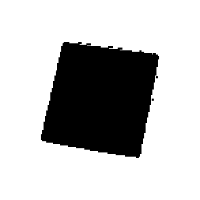

circle


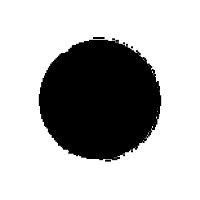

star


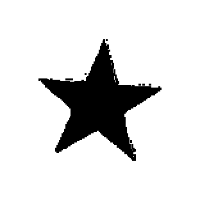

triangle


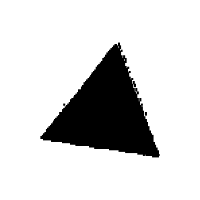

square


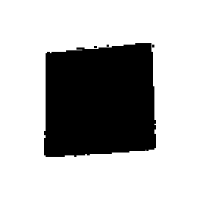

circle


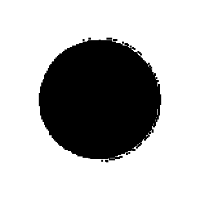

star


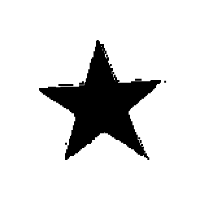

triangle


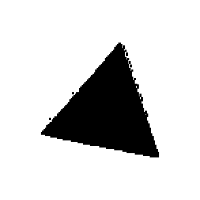

square


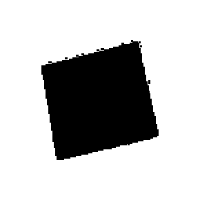

circle


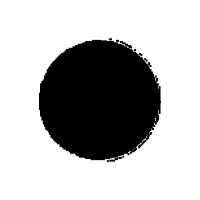

star


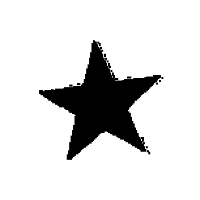

triangle


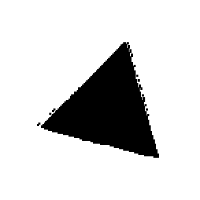

square


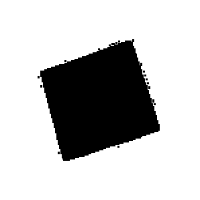

circle


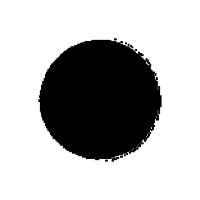

star


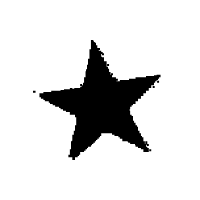

triangle


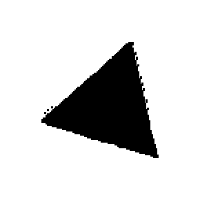

square


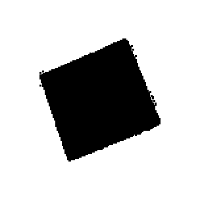

circle


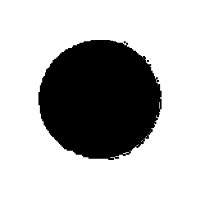

star


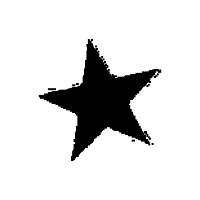

triangle


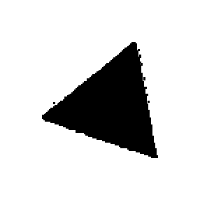

square


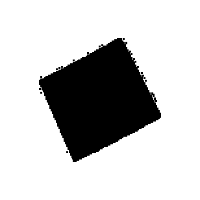

circle


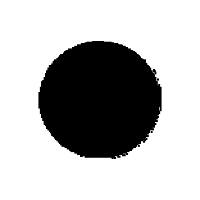

star


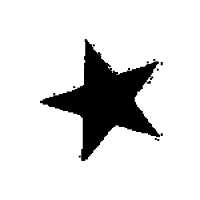

triangle


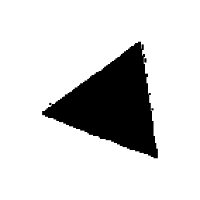

square


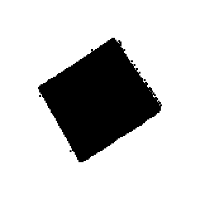

circle


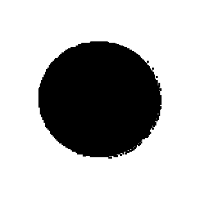

star


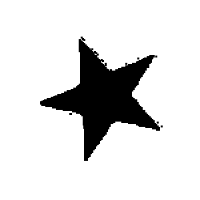

triangle


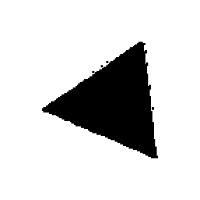

square


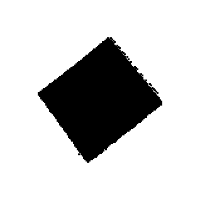

circle


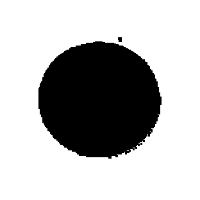

star


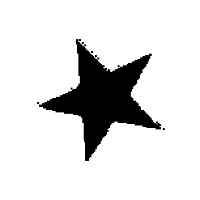

triangle


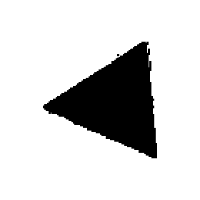

square


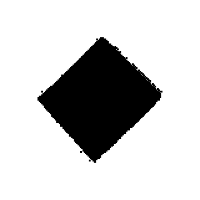

circle


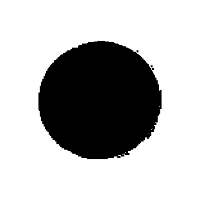

star


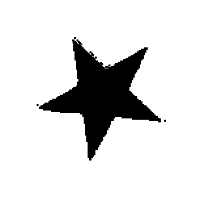

triangle


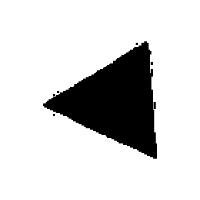

square


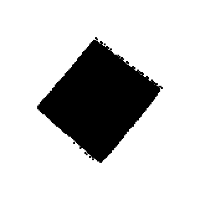

circle


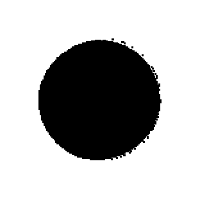

star


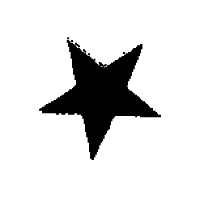

triangle


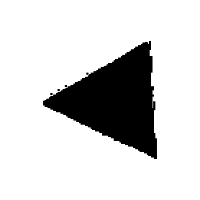

square


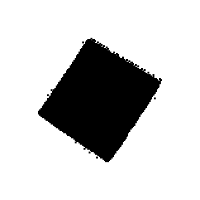

circle


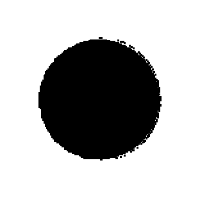

star


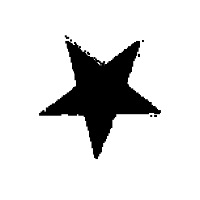

triangle


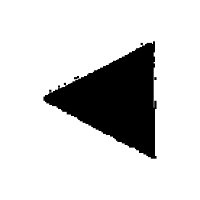

square


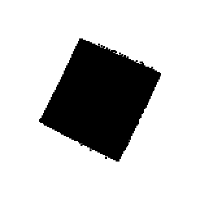

circle


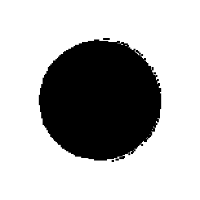

star


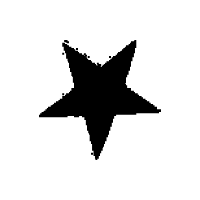

triangle


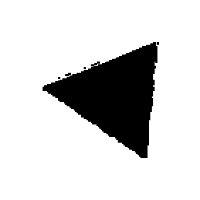

square


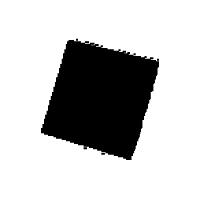

circle


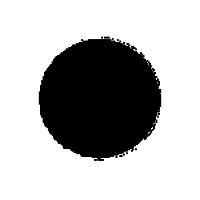

star


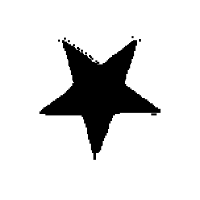

triangle


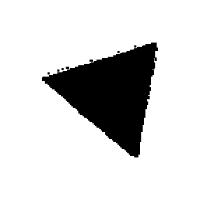

square


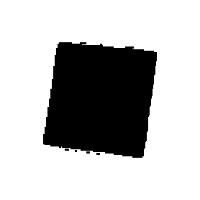

circle


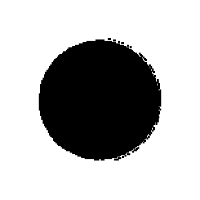

star


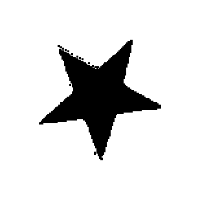

triangle


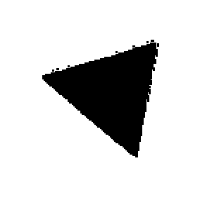

square


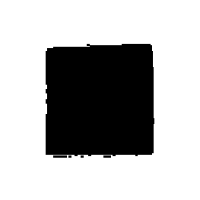

circle


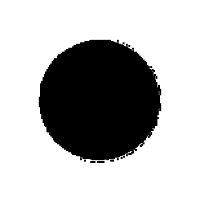

star


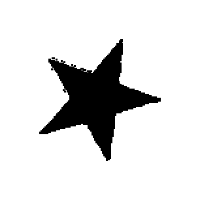

triangle


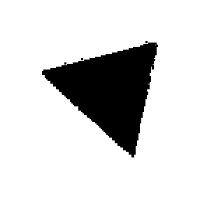

square


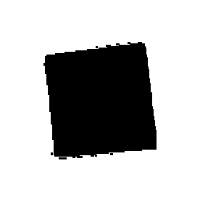

circle


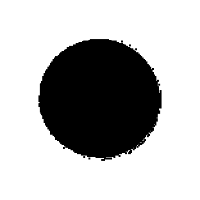

star


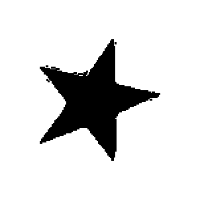

triangle


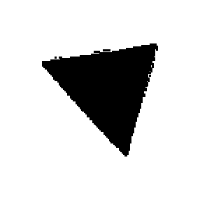

square


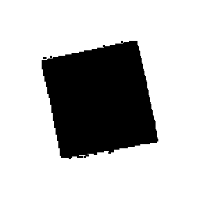

circle


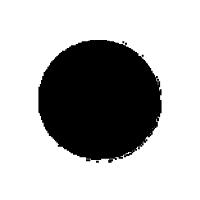

star


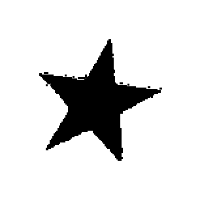

triangle


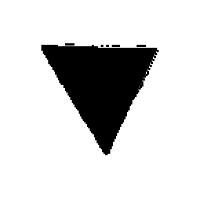

square


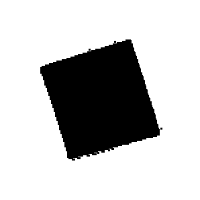

circle


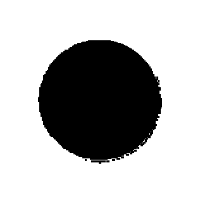

star


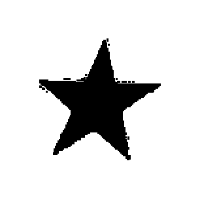

triangle


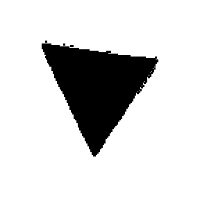

square


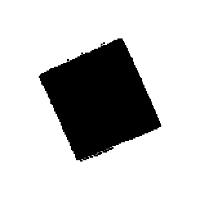

circle


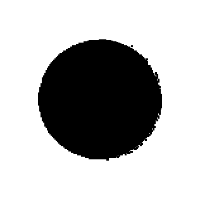

star


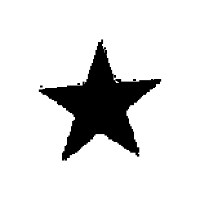

triangle


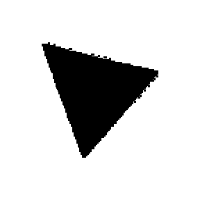

square


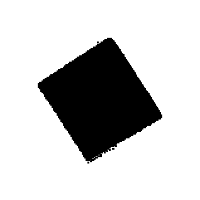

circle


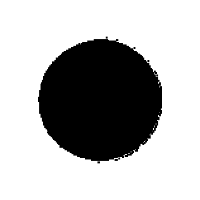

star


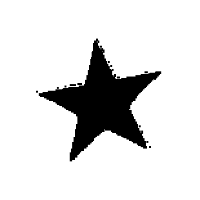

triangle


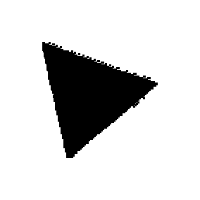

square


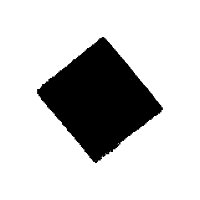

circle


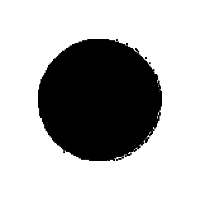

star


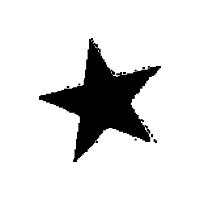

triangle


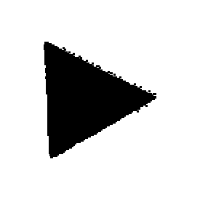

square


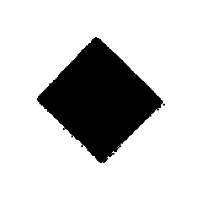

circle


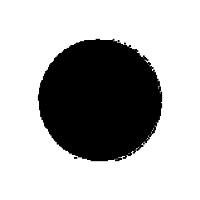

star


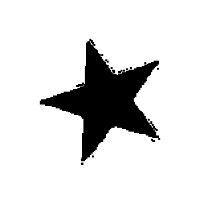

triangle


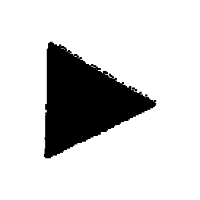

square


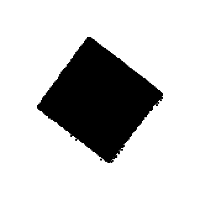

circle


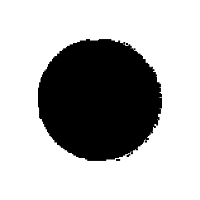

star


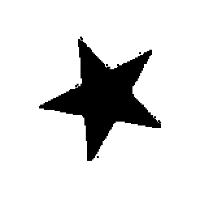

triangle


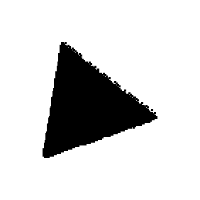

square


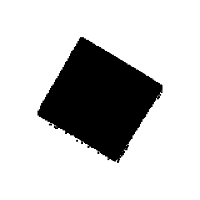

circle


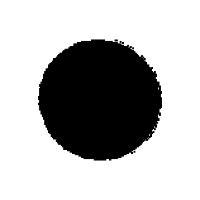

star


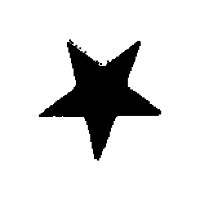

triangle


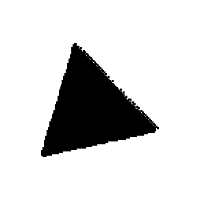

square


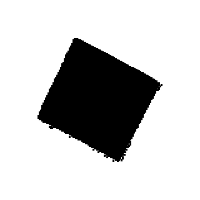

circle


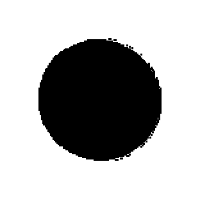

star


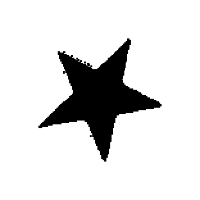

triangle


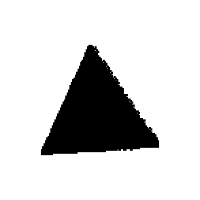

square


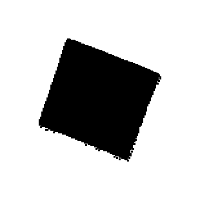

circle


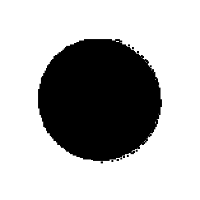

star


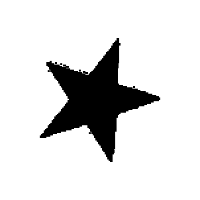

triangle


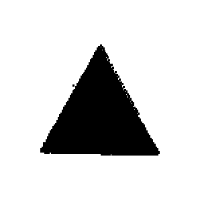

square


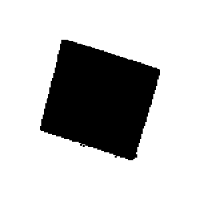

circle


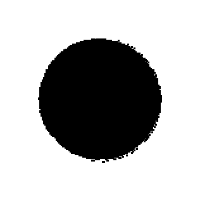

star


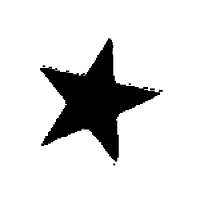

triangle


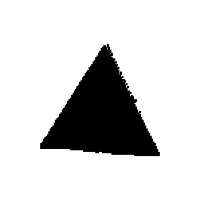

square


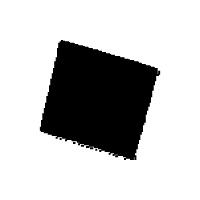

circle


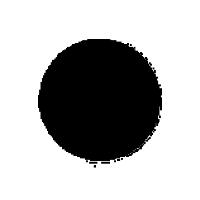

star


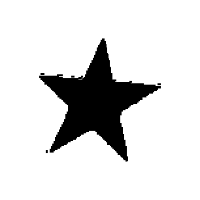

triangle


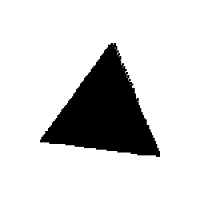

square


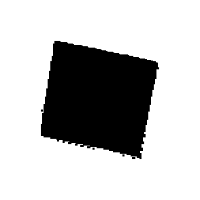

circle


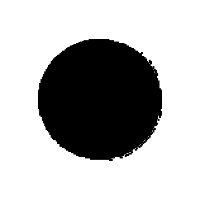

star


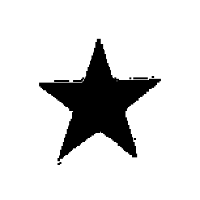

triangle


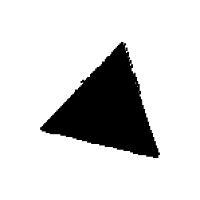

square


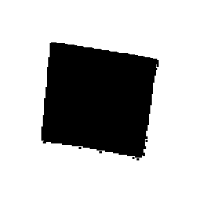

circle


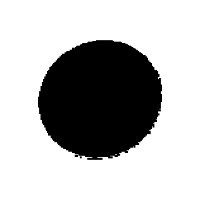

star


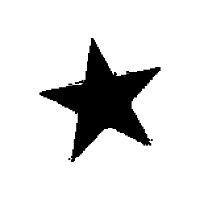

triangle


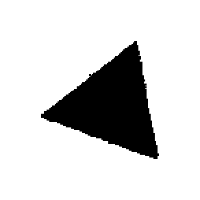

square


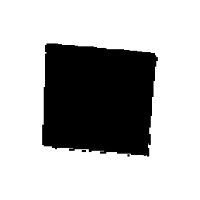

circle


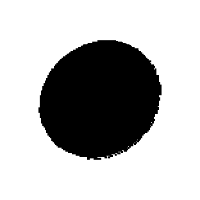

star


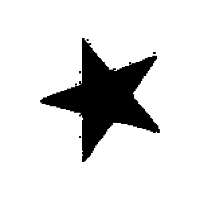

triangle


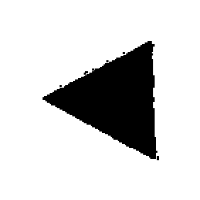

triangle


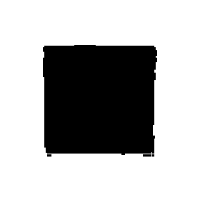

circle


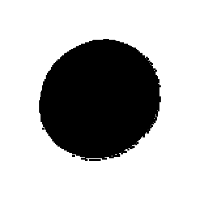

star


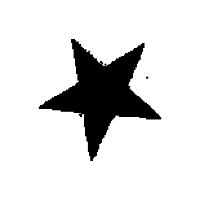

triangle


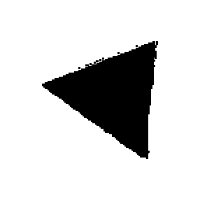

triangle


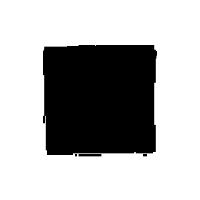

circle


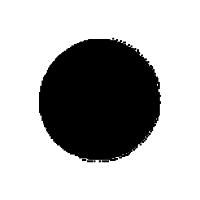

star


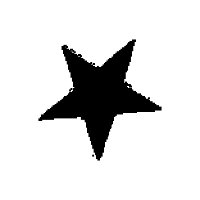

triangle


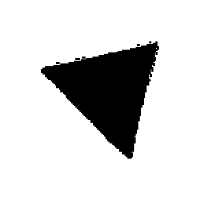

square


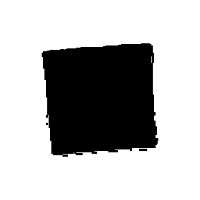

circle


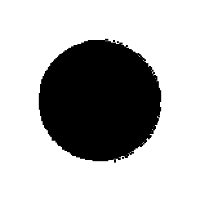

star


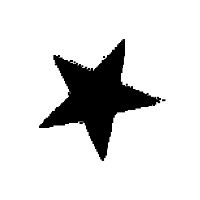

triangle


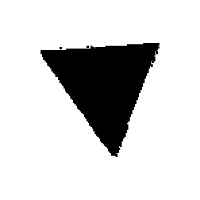

square


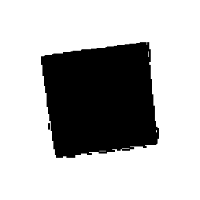

circle


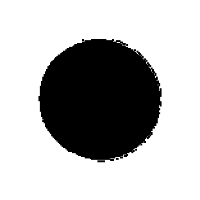

star


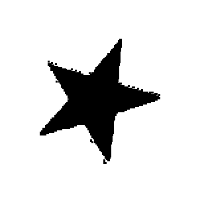

triangle


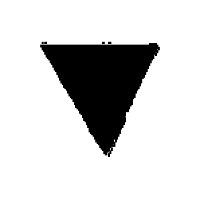

square


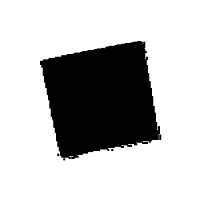

circle


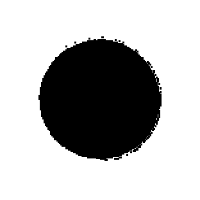

star


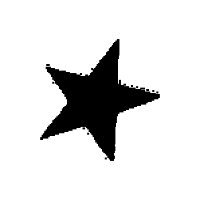

triangle


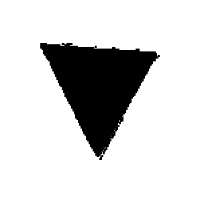

square


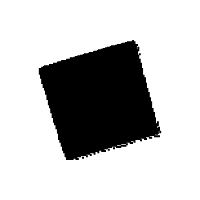

circle


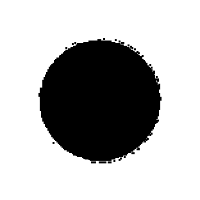

star


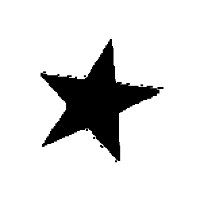

triangle


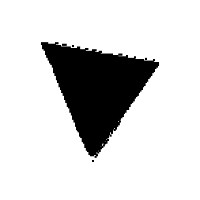

square


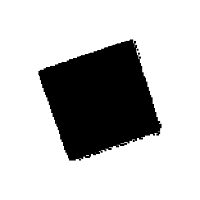

circle


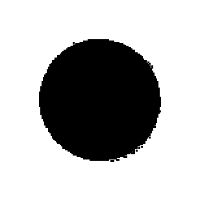

star


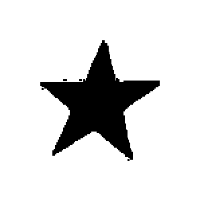

triangle


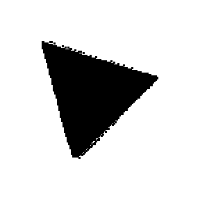

square


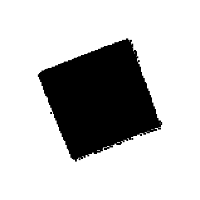

circle


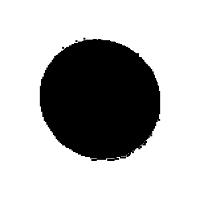

star


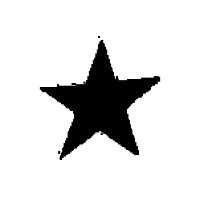

triangle


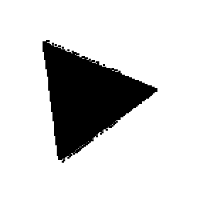

square


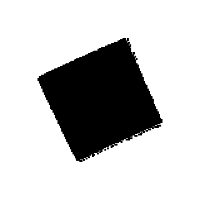

circle


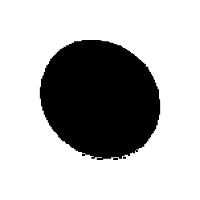

star


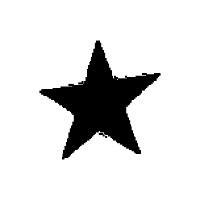

triangle


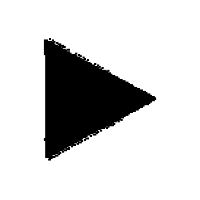

square


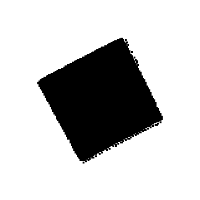

circle


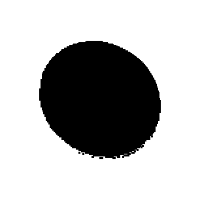

star


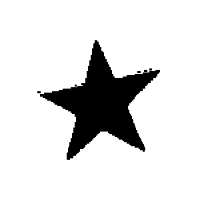

triangle


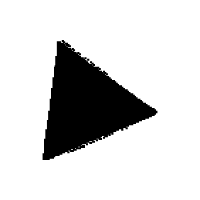

square


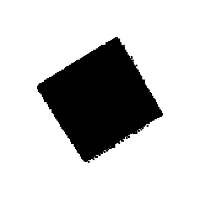

circle


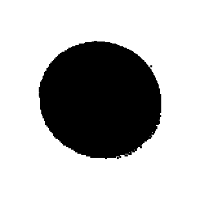

star


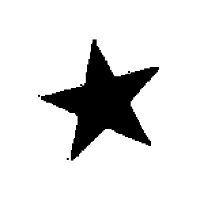

triangle


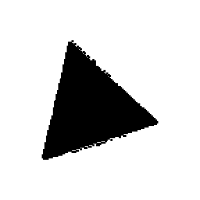

square


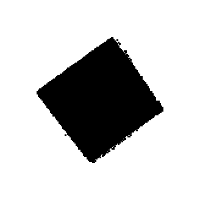

circle


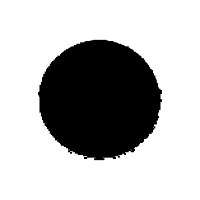

star


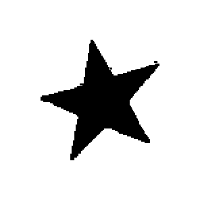

triangle


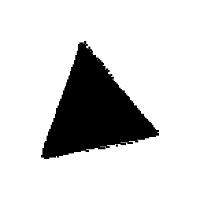

square


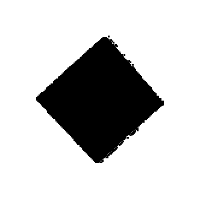

circle


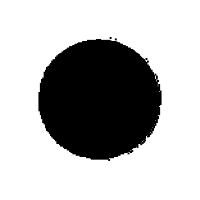

star


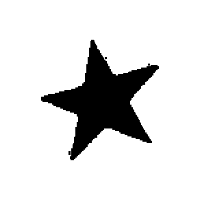

triangle


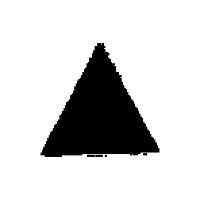

square


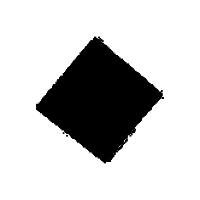

circle


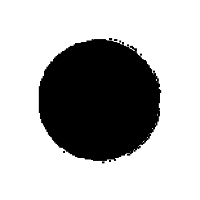

star


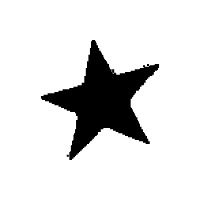

triangle


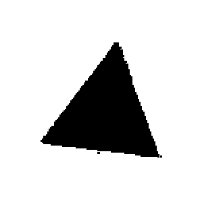

square


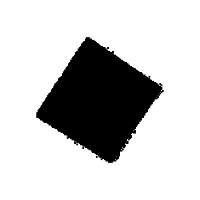

circle


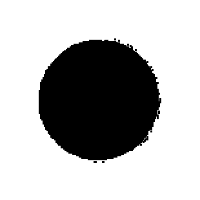

star


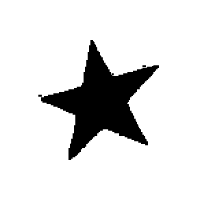

triangle


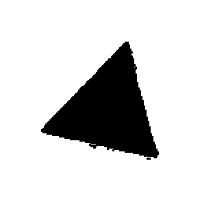

square


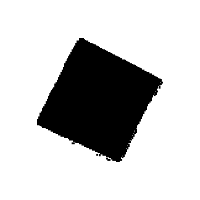

In [5]:
# Normalize prediction and associate best guess with category
for i in range(len(prediction)):
    prediction[i] /= sum(prediction[i])
    maxVal = 0
    for j in range(len(prediction[i])):
        if (prediction[i][j] > maxVal):
            maxVal = prediction[i][j]
            index = j
    output[i][1] = (shape[index])

for i in output:
    print(i[1])
    display(Image.open(i[0]))

In [56]:
def generateTrainingPolygon(num: int,
                            vertices: int,
                            xSize: int = 200,
                            ySize: int = 200,
                            randomScale: bool = True,
                            randomRotation: bool = True,
                            tweaks: bool = False) -> Image:

    scale = np.random.randint(1, ((xSize + ySize) / 4)) if randomScale else 1
    rotation = np.random.rand() if randomRotation else 0
    coords = polyGen(vertices, scale, 2 * np.pi * rotation)

    corePolygon = Image.new('RGBA', (200, 200))
    modifiedPolygon = Image.new('RGBA', (200, 200))

    polygonDrawing = ImageDraw.Draw(corePolygon)
    polygonDrawing.polygon(coords, fill = 'black', outline = 'black')
    modifiedPolygon.paste(corePolygon, mask = corePolygon)
#     modifiedPolygon = modifiedPolygon.convert('L')
    if (tweaks):
        modifiedPolygon = modifiedPolygon.filter(ImageFilter.BLUR)
    return (modifiedPolygon)

# Generates Polygons based on number of side, and random shift(rotational, x, and y)
def polyGen(s, scale = 1, r_shift = 0, x_shift = 0, y_shift = 0):
    p  = []
    for i in range(s):       
        p.append((scale* (1 + np.cos(2 *i * np.pi/s + r_shift) + x_shift), scale * (1 + np.sin(2 *i * np.pi / s + r_shift) + y_shift)))
    return p

def decodeOneHot(prediction):
    prediction = prediction.tolist()
    index = prediction.index(max(prediction))
    if index == 0:
        return 'point'
    elif index == 1:
        return 'line'
    elif index == 2:
        return 'triangle'
    elif index == 3:
        return 'square'
    elif index == 4:
        return 'pentagon'
    elif index == 5:
        return 'hexagon'
    
def encodeOneHot(vertices, size = 6):
    shape = np.zeros(size)
    shape[vertices - 1] = 1
    return shape

In [60]:
numImages = 800
images = []
labels = []

imageData = []
for i in range(numImages):
    # Require at least two vertices
    vertices = (i % 4) + 3
    # It's having problems with rotations. Set the last parameter here to 'True' to see it perform poorly
    image = generateTrainingPolygon(1, vertices, 200, 200, True, False)
    images.append(image)
    imageData.append((tf.keras.preprocessing.image.img_to_array(image) / 255.0))
    labels.append(encodeOneHot(vertices))


In [61]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 4), activation='relu'))
model.add(MaxPooling2D(pool_size = (8, 8)))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 6, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'mean_squared_error')
model.fit(np.array(imageData[:800]), np.array(labels[:800]), batch_size = 32, epochs = 2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 198, 198, 32)      1184      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                1179712   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 390       
Total params: 1,181,286
Trainable params: 1,181,286
Non-trainable params: 0
_________________________________________________________________


triangle


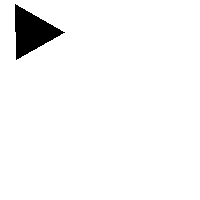

square


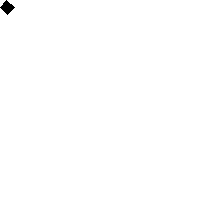

pentagon


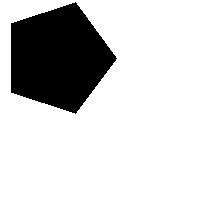

hexagon


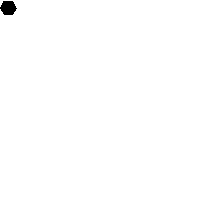

pentagon


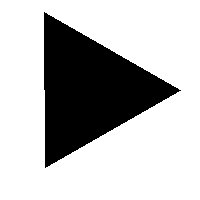

pentagon


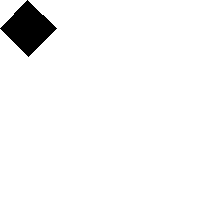

pentagon


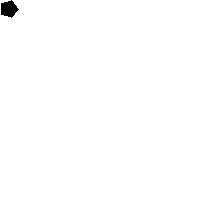

hexagon


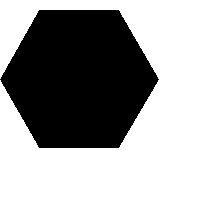

triangle


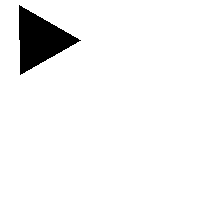

square


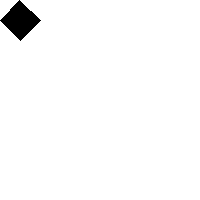

pentagon


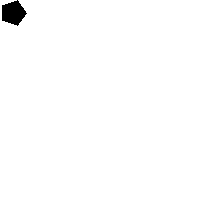

pentagon


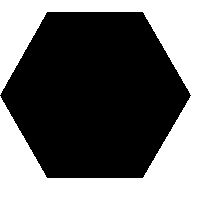

triangle


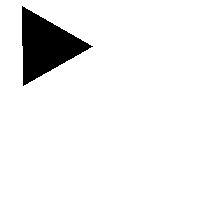

square


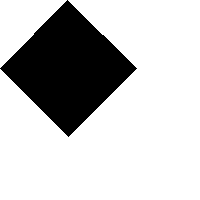

pentagon


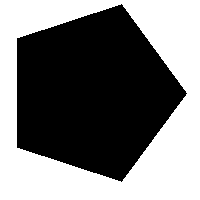

hexagon


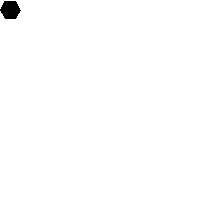

triangle


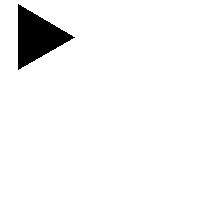

square


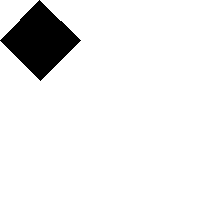

pentagon


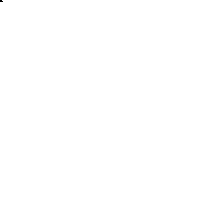

hexagon


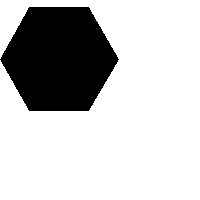

triangle


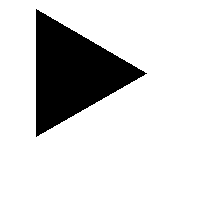

square


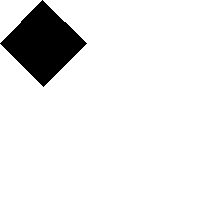

pentagon


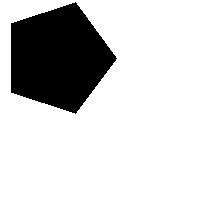

pentagon


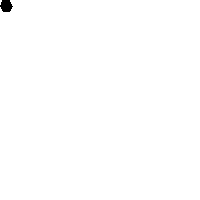

triangle


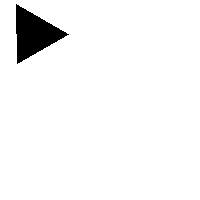

pentagon


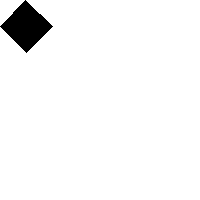

pentagon


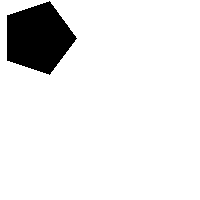

hexagon


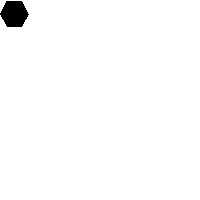

pentagon


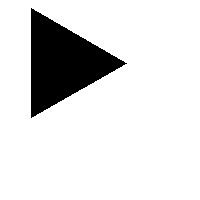

square


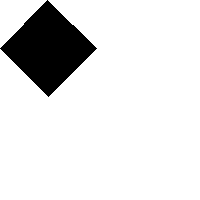

pentagon


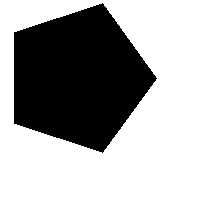

hexagon


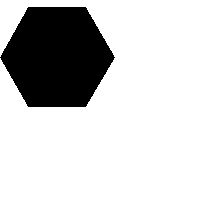

triangle


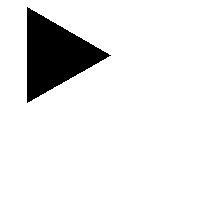

square


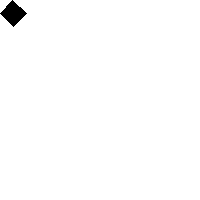

pentagon


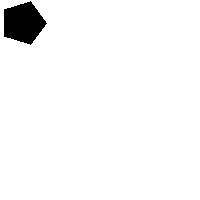

hexagon


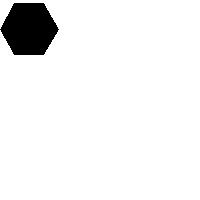

triangle


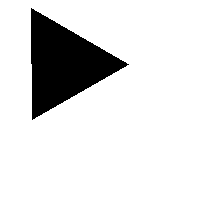

square


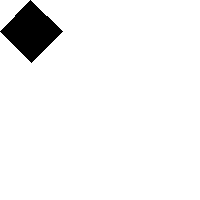

pentagon


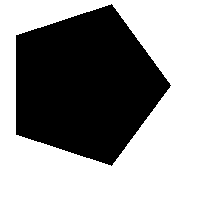

hexagon


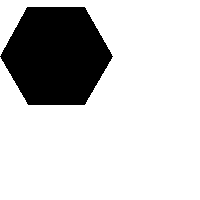

triangle


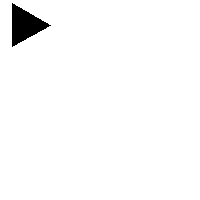

square


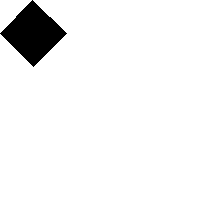

pentagon


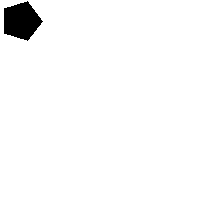

hexagon


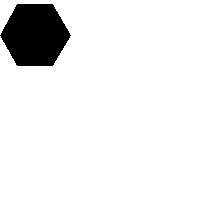

pentagon


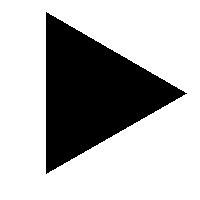

square


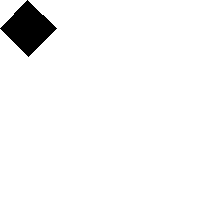

pentagon


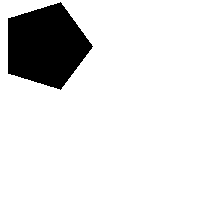

pentagon


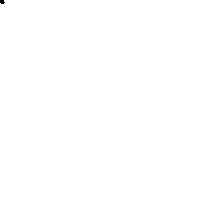

triangle


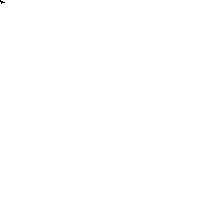

square


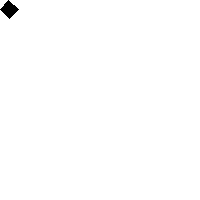

pentagon


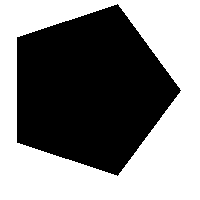

hexagon


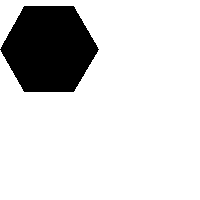

triangle


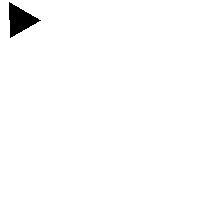

square


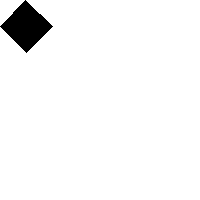

pentagon


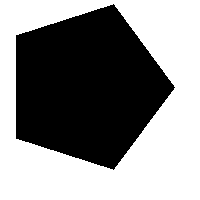

pentagon


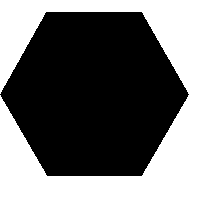

triangle


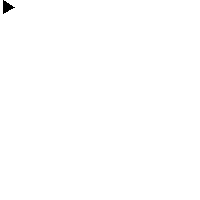

square


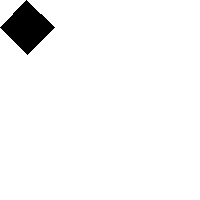

pentagon


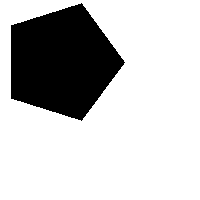

hexagon


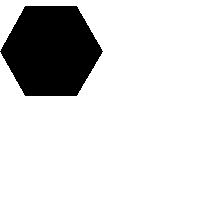

triangle


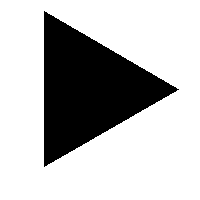

square


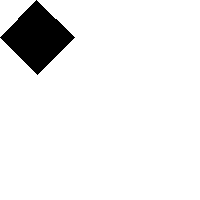

pentagon


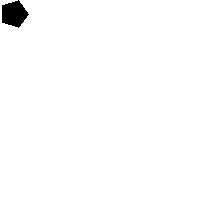

hexagon


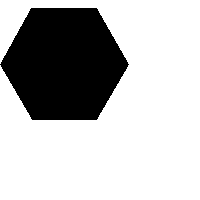

triangle


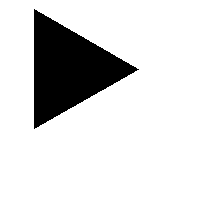

square


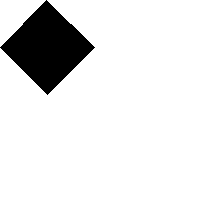

pentagon


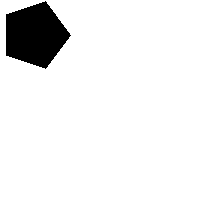

hexagon


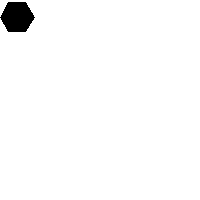

triangle


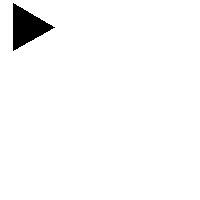

pentagon


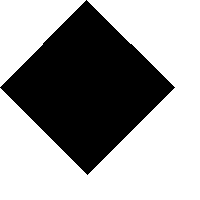

pentagon


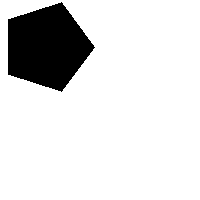

hexagon


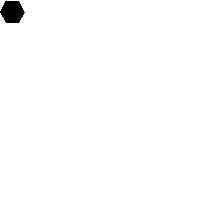

triangle


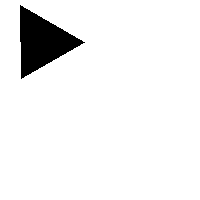

pentagon


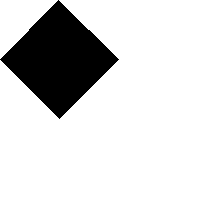

pentagon


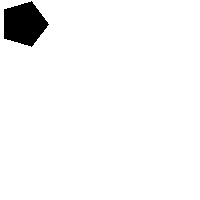

hexagon


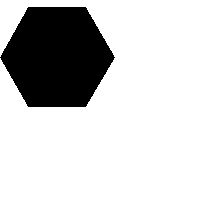

triangle


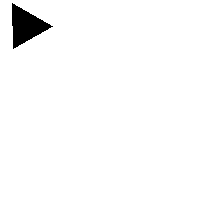

square


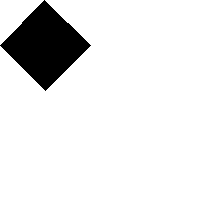

pentagon


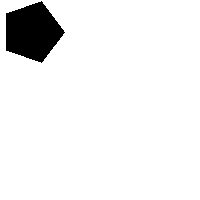

hexagon


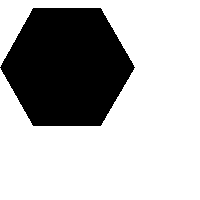

pentagon


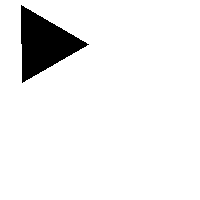

square


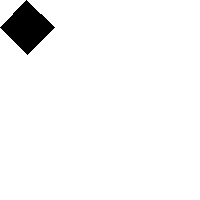

pentagon


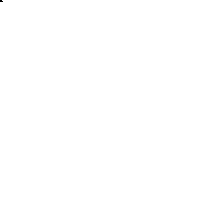

pentagon


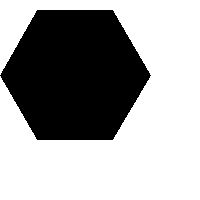

triangle


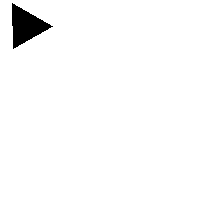

square


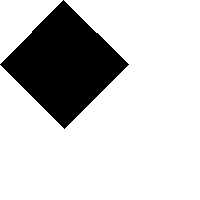

pentagon


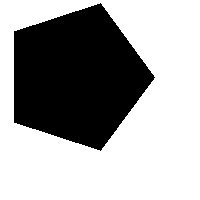

hexagon


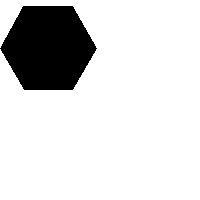

triangle


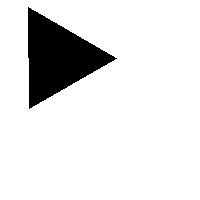

square


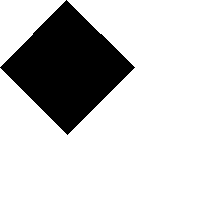

pentagon


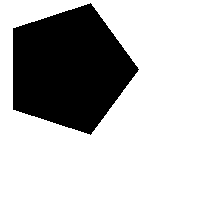

hexagon


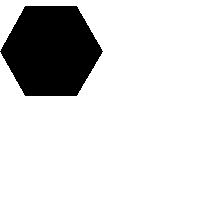

triangle


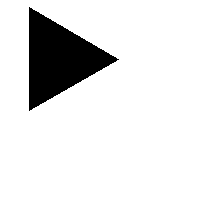

pentagon


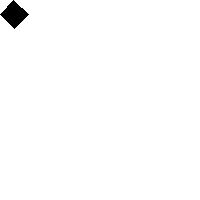

pentagon


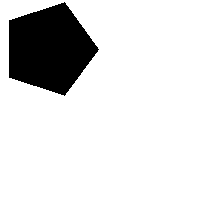

hexagon


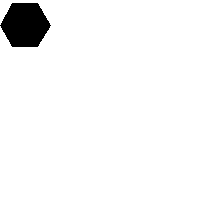

triangle


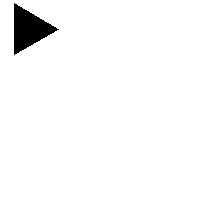

pentagon


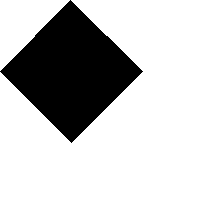

pentagon


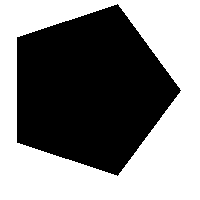

hexagon


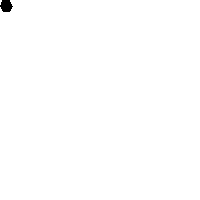

In [62]:
predictions = model.predict(np.array(imageData[300:]))

for i in range(100):
    print(decodeOneHot(predictions[i]))
    display(images[i])